# Set up

In [60]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
# from tensorflow import keras
# from tensorflow.python.keras import backend as K

from keras import backend as K
# from keras.models import Sequential
from tensorflow.keras.layers import Activation
# from keras.layers.core import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import time

In [2]:
# NAME = "dogs-vs-cats-{}".format(int(time.time()))
# tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

In [61]:
train_path = '/Users/tonyodongo/Desktop/dogs-vs-cats/train/train'
valid_path = '/Users/tonyodongo/Desktop/dogs-vs-cats/valid/valid'
test_path = '/Users/tonyodongo/Desktop/dogs-vs-cats/test/test'

In [62]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)

Found 20556 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.


In [63]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [64]:
imgs, labels = next(train_batches)

/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


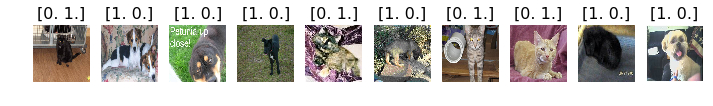

In [65]:
plots(imgs, titles=labels)

# Build and train CNN

In [66]:

# model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)),
#         Flatten(),
#         Dense(2, activation='softmax'),
#     ])

In [67]:
# model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
# model.summary()

In [69]:
# model.fit_generator(train_batches, steps_per_epoch=4, 
#                     validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2, callbacks=[tensorboard])


In [70]:
# dense_layers = [0, 1, 2]
# layer_sizes = [32, 64, 128]
# conv_layers = [1, 2, 3]

# for dense_layer in dense_layers:
#     for layer_size in layer_sizes:
#         for conv_layer in conv_layers:
#             NAME = "dog-{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
#             print(NAME)

#             model = Sequential()

#             model.add(Conv2D(layer_size, (3, 3), input_shape=(224,224,3)))
#             #model.add(Conv2D(layer_size, (3, 3), input_shape=train_batches.shape[1:]))
#             model.add(Activation('relu'))
#             model.add(MaxPooling2D(pool_size=(2, 2)))

#             for l in range(conv_layer-1):
#                 model.add(Conv2D(layer_size, (3, 3)))
#                 model.add(Activation('relu'))
#                 model.add(MaxPooling2D(pool_size=(2, 2)))

#             model.add(Flatten())

#             for _ in range(dense_layer):
#                 model.add(Dense(layer_size))
#                 model.add(Activation('relu'))

#             model.add(Dense(2))
#             model.add(Activation('sigmoid'))

#             tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

#             model.compile(loss='binary_crossentropy',
#                           optimizer='adam',
#                           metrics=['accuracy'],
#                            )
#             #model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

#             model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2, callbacks=[tensorboard])

In [71]:
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "cat-{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)
            
        model = Sequential([
                Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)),
                Flatten(),
                Dense(2, activation='softmax'),
            ])
        model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit_generator(train_batches, steps_per_epoch=4, 
                   validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2, callbacks=[tensorboard])

cat-1-conv-32-nodes-0-dense-1575957561
cat-2-conv-32-nodes-0-dense-1575957561
cat-3-conv-32-nodes-0-dense-1575957561
Epoch 1/5
4/4 - 2s - loss: 6.5906 - accuracy: 0.5500 - val_loss: 9.0664 - val_accuracy: 0.4375
Epoch 2/5
4/4 - 2s - loss: 8.4620 - accuracy: 0.4750 - val_loss: 9.0664 - val_accuracy: 0.4375
Epoch 3/5
4/4 - 2s - loss: 9.6709 - accuracy: 0.4000 - val_loss: 9.0664 - val_accuracy: 0.4375
Epoch 4/5
4/4 - 2s - loss: 8.8650 - accuracy: 0.4500 - val_loss: 9.0664 - val_accuracy: 0.4375
Epoch 5/5
4/4 - 1s - loss: 6.4472 - accuracy: 0.6000 - val_loss: 9.0664 - val_accuracy: 0.4375
cat-1-conv-64-nodes-0-dense-1575957571
cat-2-conv-64-nodes-0-dense-1575957571
cat-3-conv-64-nodes-0-dense-1575957571
Epoch 1/5
4/4 - 2s - loss: 9.0988 - accuracy: 0.4250 - val_loss: 9.0664 - val_accuracy: 0.4375
Epoch 2/5
4/4 - 2s - loss: 8.8650 - accuracy: 0.4500 - val_loss: 9.0664 - val_accuracy: 0.4375
Epoch 3/5
4/4 - 2s - loss: 6.8502 - accuracy: 0.5750 - val_loss: 9.0664 - val_accuracy: 0.4375
Epoch 

In [33]:
import tensorflow as tf

In [12]:
tf.__version__

'2.0.0'

# Predict

/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


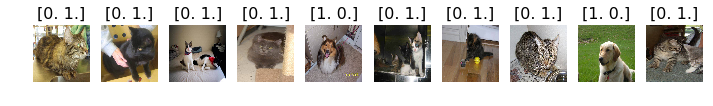

In [13]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [14]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0.], dtype=float32)

In [15]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [16]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [17]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 8]
 [0 2]]


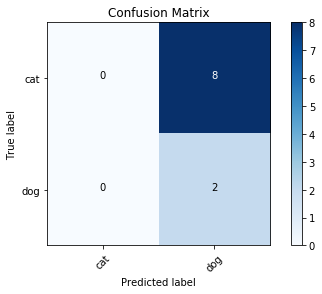

In [19]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

## Build Fine-tuned VGG16 model

In [20]:
vgg16_model = keras.applications.vgg16.VGG16()

NameError: name 'keras' is not defined

In [1]:
vgg16_model.summary()

NameError: name 'vgg16_model' is not defined

In [2]:
type(vgg16_model)

NameError: name 'vgg16_model' is not defined

In [ ]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [ ]:
model.summary()

In [ ]:
model.layers.pop()

In [ ]:
model.summary()

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

## Train the fine-tuned VGG16 model

In [ ]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(train_batches, steps_per_epoch=5, 
                    validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

In [ ]:
#old model results
#model.fit_generator(train_batches, steps_per_epoch=4, 
#                    validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

If saving this model with model.save('file.h5'), note that some users have reported the following error when loading the model using load_model('file.h5'):
    
ValueError: Dimension 0 in both shapes must be equal, but are 4096 and 1000.
Shapes are [4096,10] and [1000,10]. for 'Assign_61' (op: 'Assign') with input shapes: [4096,10], [1000,10].
   
If you receive this error, please see the answer in this stackoverflow post:
https://stackoverflow.com/questions/48482483/valueerror-when-loading-a-previously-saved-retrained-vgg16-model-using-keras

## Predict using fine-tuned VGG16 model

In [ ]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [ ]:
test_labels = test_labels[:,0]
test_labels

In [ ]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [ ]:
np.argmax(predictions, axis=1)

In [ ]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

In [ ]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [ ]:
#old model results
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [ ]:
model_json = model.to_json()
with open("cats-vs-dogs.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("cats-vs-dogs.h5")
print("Saved model to disk")

In [ ]:
model.save('cats_dogs.h5')

In [ ]:
import sys

In [ ]:
sys.version_info